In [1]:
#import libraries and set up options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from csv
events = pd.read_csv('gameevents.csv')
rosters = pd.read_csv('gamerosters.csv')
teams = pd.read_csv('teams.csv')

In [3]:
#Set the colors to be used in the graph
penguinsColor = "#cccc00"
capitalsColor = "#0000b3"

In [4]:
'''
The style class is used to style the print statements.

Usage Example: 

print(style.BOLD+"Sample 1"+style.END+"Sample 2"): This will print "Sample 1" in bold and Sample 2 without any formatting.
'''
#Formatting the print statements
class style:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Exploratory Data Analysis

###### Events

In [5]:
print("Shape of","events",events.shape)

Shape of events (1988, 18)


In [6]:
print("Check the missing values in","events")
# events.isna().sum()

Check the missing values in events


###### Rosters

In [7]:
print("Shape of","rosters",rosters.shape)

Shape of rosters (40, 7)


In [9]:
print("Check the missing values in","rosters")
# rosters.isna().sum()

Check the missing values in rosters


###### Teams

In [10]:
print("Shape of","teams",teams.shape)

Shape of teams (31, 6)


In [11]:
print("Check the missing values in","teams")
# teams.isna().sum()

Check the missing values in teams


## Analysis 1: Handedness by player position and team

Let's join the rosters and teams dataframes. We will exclude the goalies, and group by teamShorthand, primaryPosition and handedness. Finally, we will plot a horizontal bar chart showing handedness by player position and team.

###### Join the `rosters` and `teams` dataframes

In [12]:
dfTeamRoster = rosters.join(teams.set_index('teamId'), on='teamId', how='left')
#dfTeamRoster.head()

###### Exclude goalies and grouping data by `teamShorthand`, `primaryPosition` and `handedness`

In [15]:
#Select the data and group it by teamShorthand','primaryPosition','handedness'
dfQ1 = dfTeamRoster[dfTeamRoster['primaryPosition']!='G'].groupby(['teamShorthand','primaryPosition','handedness', 'teamName']
                              ).size().reset_index()
dfQ1.rename(columns={0:'handednessCount'}, inplace=True)

###### Create a horizontal bar chart showing handedness by player position and team

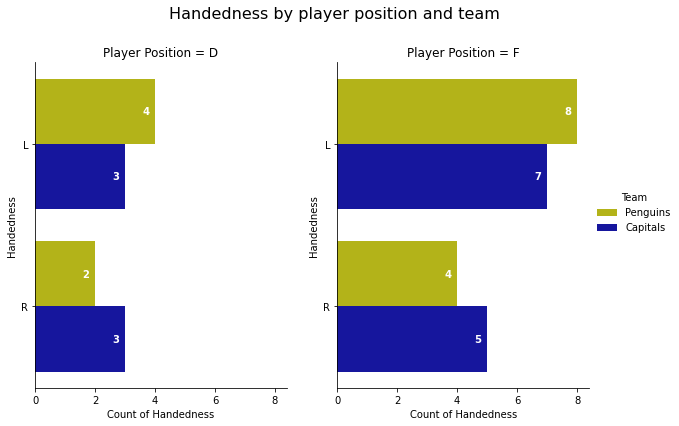

In [16]:
#Create a barchart for selected data
g = sns.catplot(x="handednessCount", y="handedness",
                hue="teamName", col="primaryPosition",
                data=dfQ1, kind="bar", palette=[penguinsColor,capitalsColor],
                height=6, aspect=.7, legend=True, sharey = False)

#Traverse through each subplot and add the numbers on each bars
for ax, title in zip(g.axes.flat, ['Player Position = D', 'Player Position = F']):
    ax.set_title(title)
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text = f'{width:.0f}'  # f'{height:.2f}' to format decimal values

        label_x = x + width - 0.2  # adjust 0.2 to center the label
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='right', 
                va='center', color="white", fontsize=10,
               fontweight="bold")

#Add the title, axis labels and legend
g.fig.subplots_adjust(top=0.85, wspace=0.2)
g.fig.suptitle('Handedness by player position and team', fontsize=16)
g._legend.set_title('Team')
_ = g.set(ylabel="Handedness", xlabel="Count of Handedness")

<b><u>Observations from Analysis 1:</u></b>

* Capitals team has a equal numbers of left and right handed defenders.

* Penguins team seems more inbalanced in terms of handedness and towards F position.